## 빅데이터 활용 AI 설계
# MNIST 신경망 적용

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### MNIST 불러오기

In [2]:
from keras.datasets import mnist

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### 데이터 전처리
- 값을 0~1 사이로 변환
- 28X28 이미지를 옆으로 펼친다.
- y 값은 원핫인코딩으로 바꾼다. (5 => [0,0,0,0,0,1,0,0,0,0])

In [5]:
from keras.utils import to_categorical

X_train = X_train.reshape(-1, 28*28)/255.
X_test = X_test.reshape(-1, 28*28)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [7]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
y_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### 가장 간단한 신경망
- 입력과 출력만 있다

<img src='https://mmlind.github.io/images/1lnn_input.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)
- 그림에서 픽셀 갯수가 잘못 표기됨 (784가 맞음)

<img src='https://mmlind.github.io/images/1lnn_nnlayer.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 픽셀 수가 784 이므로 속성 갯수가 784인 경우이다.
- w1, w2, w3, ..., w784, b
- w1\*x1 + w2\*x2 + ... + w784\*x784 + b

### 타겟 클래스가 10개
- MNIST 에서 타겟 클래스가 0~9 로 총 10개 이다.

<img src='https://mmlind.github.io/images/1lnn.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 타겟 클래스가 10개이므로, 가중치와 절편이 그 만큼 늘어난다.
- 클래스값 0 => w1_1, w1_2, ..., w1_784, b1
- 클래스값 1 -> w2_1, w2_2, ..., w2_784, b2
- 총 가중치 = 784\*10, 총 절편 = 10

### 신경망 적용 절차 (<font color='red'>중요</font>)

1. 데이터를 준비한다. (입력데이터와 목표데이터)
2. 머신을 준비한다. (w 와 b 등의 상태값 구축 및 초기화, 손실값을 조절하는 알고리즘 정의)
3. 손실값을 정의한다.
4. 머신에 입력데이터를 넣고 손실값을 계산한다. (예측값과 목표데이터의 차이를 계산)
5. 손실값을 줄이도록 머신의 상태값을 변경한다. (w 와 b 값을 조정한다.)
6. 4로 돌아간다.

### 손실값 정의

<img src='https://mmlind.github.io/images/1lnn_full.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 위와 같은 결과를 얻었을 때, 손실값을 어떻게 계산할까?
- mse = (0.003126 - 0)^2 + ... + (0.682134 - 1)^2 + ...
- 위와 같이 mse 를 적용할 수 있다.
- 하지만, 이런 멀티 클래스의 경우에는 다른 손실값을 적용하는 것이 일반적이다.
- 위 그림은 숫자 6을 판별한 것이다. 그러므로 결과값은 6 위치만 값이 1이다.
> cross\_entropy\_i = -log(0.682134), 입력 이미지 1개에 대한 손실값
- 모든 숫자 이미지에 대한 크로스엔트로피를 평균한 것이 최종 손실값이다.
> $ cross\_entropy = 1/N \cdot \sum_i {-log(해당숫자의 예측값)} $

### Softmax 함수

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6QRL4yW5p4j634dzSyjZWMWWCGXaU_MZVnqDq_HErnH5RCCIizQ' />
(출처 : https://www.google.com/search?tbm=isch&sa=1&ei=VFNCXfrICcybmAWZw6_ACQ&q=mnist+softmax&oq=mnist+softmax&gs_l=img.3..0i24l3.528.3330..3872...0.0..1.585.3193.0j1j5j2j1j1......0....1..gws-wiz-img.uKr_Bjki0oA&ved=0ahUKEwj6wvvf1ODjAhXMDaYKHZnhC5gQ4dUDCAY&uact=5#imgrc=Bwc55tfbS2SjXM:)

- 실제로는 위와 같이 마지막 출력값을 내기 전에 softmax 라는 함수를 적용하여 출력값을 바꾸어 준다.

<img src='https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg' />
(출처: https://www.youtube.com/watch?v=lvNdl7yg4Pg)

- 출력값이 [2,1,0.1] 일때, 각각에 exponential 지수를 적용한 값의 비율을 구한 것이 softmax 이다.
- softmax 를 적용하면 최종 출력값을 모두 더하면 1이 된다. (즉 확률 개념이 된다.)

### Keras 로 구현

<img src='mnist_nn.jpg' />
(출처: http://users.jyu.fi/~olkhriye/ties4911/lectures/Lecture03.pdf )<br>
<img src='https://image.slidesharecdn.com/tensorflowppt-160408142819/95/tensorflow-5-638.jpg?cb=1460125744' />
(출처: https://www.slideshare.net/jirimaterna/tensorflow-60661959 )

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

- 이전에는 손실값을 줄이는 알고리즘으로 SGD 를 사용하였다.
- SGD 보다 향상된 알고리즘인 RMSProp 를 적용해 보자.

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [12]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.6575 - acc: 0.8407 - val_loss: 0.3576 - val_acc: 0.9035
Epoch 2/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.3507 - acc: 0.9041 - val_loss: 0.3069 - val_acc: 0.9147
Epoch 3/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.3151 - acc: 0.9118 - val_loss: 0.2917 - val_acc: 0.9175
Epoch 4/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.2989 - acc: 0.9170 - val_loss: 0.2806 - val_acc: 0.9232
Epoch 5/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.2892 - acc: 0.9195 - val_loss: 0.2760 - val_acc: 0.9237
Epoch 6/20
48000/48000 [==============================] - 4s 78us/step - loss: 0.2825 - acc: 0.9208 - val_loss: 0.2718 - val_acc: 0.9253
Epoch 7/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.2776 - acc: 0.9225 - val_loss: 0.2680 - val_acc

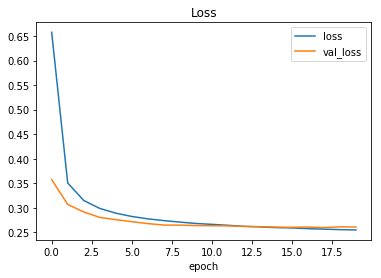

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

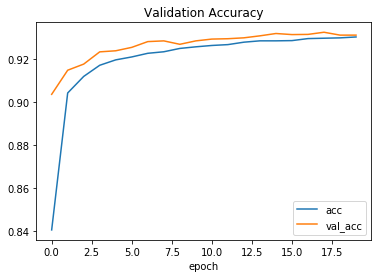

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

### 가중치 분석
- 하나의 타겟 클래스로 향하는 화살표를 보면 모두 784개이다.
- 화살표 마다 가중치가 하나씩 있으므로 클래스 마다 28X28 인 이미지로 표시할 수 있다.

In [19]:
ws = model.get_weights()

In [20]:
ws[0].shape

(784, 10)

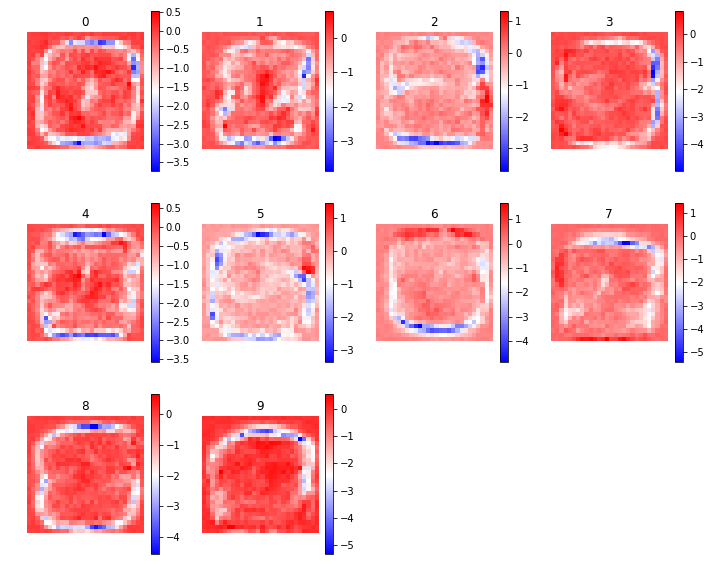

In [21]:
plt.figure(figsize=[12,10])

for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(ws[0][:,i].reshape(28,28), cmap='bwr')
    plt.axis('off')
    plt.title(i)
    plt.colorbar()

### 중간층 추가 (Hidden Layer)
- 아래 그림과 같이 입력과 출력 중간에 단계를 하나 더 넣는다. (여러개를 넣을 수도 있다.)
- 중간층의 출력값은 그냥 사용하지 않고 ReLU 함수를 적용한다.

<img src='https://ml4a.github.io/images/figures/mnist_2layers.png' />
(출처: https://ml4a.github.io/ml4a/looking_inside_neural_nets/ )

<img src='https://miro.medium.com/max/700/1*v88ySSMr7JLaIBjwr4chTw.jpeg' />
(출처: https://ml4a.github.io/ml4a/looking_inside_neural_nets/ )

- ReLU 함수

In [15]:
def relu(t):
    r = t
    if r<0: r=0
    return r

Text(0.5,1,'ReLU function')

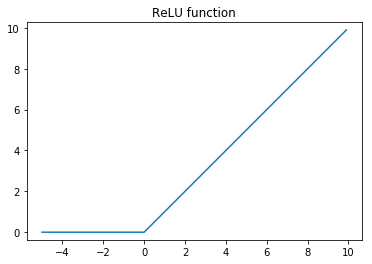

In [16]:
rng = np.arange(-5,10,0.1)
hgt = rng.copy()
hgt[hgt<0] = 0

plt.plot(rng, hgt)
plt.axis('equal')
plt.title('ReLU function')

In [17]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,))) # 128 노드, ReLU 적용
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.2)
    # default: batch_size=32, epochs=1, shuffle=True

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 15s 323us/step - loss: 0.3260 - acc: 0.8973 - val_loss: 0.1798 - val_acc: 0.9437
Epoch 2/50
48000/48000 [==============================] - 14s 302us/step - loss: 0.1269 - acc: 0.9612 - val_loss: 0.1182 - val_acc: 0.9640
Epoch 3/50
48000/48000 [==============================] - 15s 311us/step - loss: 0.0886 - acc: 0.9735 - val_loss: 0.1254 - val_acc: 0.9650
Epoch 4/50
48000/48000 [==============================] - 15s 315us/step - loss: 0.0660 - acc: 0.9799 - val_loss: 0.1219 - val_acc: 0.9674
Epoch 5/50
48000/48000 [==============================] - 15s 307us/step - loss: 0.0531 - acc: 0.9829 - val_loss: 0.1529 - val_acc: 0.9617
Epoch 6/50
48000/48000 [==============================] - 14s 301us/step - loss: 0.0420 - acc: 0.9865 - val_loss: 0.1078 - val_acc: 0.9739
Epoch 7/50
48000/48000 [==============================] - 14s 300us/step - loss: 0.0356 - acc: 0.9893 - val_loss: 0.

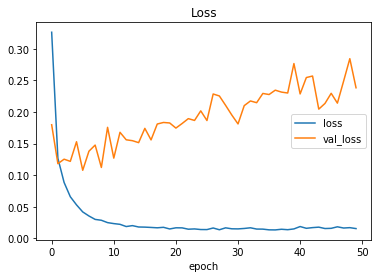

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

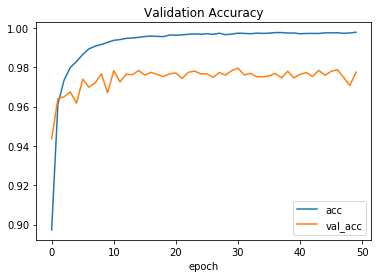

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

### 모델 검증

In [23]:
pred_y = model.predict(X_test)

In [25]:
pred_y[:10]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.4415170e-31, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.2551790e-36, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.1929105e-35,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        5.3324556e-32, 0.0000000e+00, 0.0000000e+00, 2.43

In [27]:
pred_y = model.predict_classes(X_test)

In [29]:
(y_test.argmax(axis=1) == pred_y).mean() # accuracy for test data

0.9799

In [31]:
idx = np.where((y_test.argmax(axis=1) != pred_y))[0]

Text(0.5,1,'5 / 6')

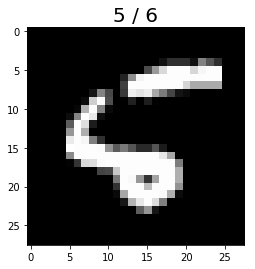

In [39]:
plt.imshow(X_test[idx[0]].reshape(28,28), cmap='gray')
plt.title(str(y_test[idx[0]].argmax())+' / '+str(pred_y[idx[0]]), fontsize=20)

### 과대적합 이슈
- 교재 4.4절

- 네트워크 크기 축소
> . 층의 갯수와 각 층의 뉴런 갯수를 줄인다.<br>
> . 층의 갯수와 뉴런 갯수를 정하는 공식은 없기 때문에, 경험적으로 최선의 값을 찾아내어야 한다.

- 가중치 규제 추가
> . 최종 손실값에 각 가중치의 제곱(L2규제)나 절대값(L1규제)를 추가한다.<br>
> . 추가되는 값이 크면(규제값이 크면) 과대적합이 적어진다.<br>
> . 규제가 클수록 w 와 b 값이 0에 가까워진다.<br>
> . 각 층의 kernel_regularizer 인자에 keras.regulations 에 있는 l1(), l2() 함수 적용

- Dropout 적용
> 각 층의 출력값 중 일부를 0 으로 만든다.<br>
> 전체 신경망의 예외 대처능력을 키워준다.<br>
> keras.layers.Dropout(0.5) 와 같이 적용한다.<br>
> 훈련 시간은 늘어나지만 훨씬 유연한 시스템을 구축할 수 있다.

### 기타 이슈
- 모델 변수(예를 들어 w 와 b) 초기화 => 모두 0인 경우 문제가 발생할 수 있다.
- 정규화 적용 => 전처리 뿐만 아니라 각 층의 결과를 정규화 해야 하는 경우도 있다.
- 학습률 및 기타 설정값 => 입력 데이터의 스케일에 맞게 학습률을 고려하여야 한다.